In [5]:
#source jupenv/pyenv/bin/activat
import torch
from torch.autograd import Variable
import numpy as np
import torch.nn as nn
import torchaudio
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm
from downModel import AutoEncoder
from torch.utils.data import DataLoader
from utils import load_dataset,myspec
from os import listdir
import math
from IPython.display import Audio



In [2]:

dataloader=load_dataset(samples=2)

trainset=DataLoader(dataloader, batch_size=1240, shuffle=False,drop_last=True, num_workers=4)


Current Samples:  1240


In [3]:

def latent_loss(mean,sd,mul):
    mean2=mean*mean
    sd2=sd*sd
    loss=mul*torch.mean(mean2+sd2-torch.log(sd2)-1)
    fll=float(torch.mean(mean2+sd2-torch.log(sd2)-1))
    return loss,fll

def upsample(x,rate=2):
    return np.interp(np.linspace(0,len(x),rate*len(x)),np.linspace(0,len(x),len(x)),x)
def downsample(x,rate=2):
    return x[::rate]

vae = AutoEncoder().cuda()

checkpoint = torch.load('../wavenet/batchMSE.tar')
vae.load_state_dict(checkpoint['vae'])
   



<All keys matched successfully>

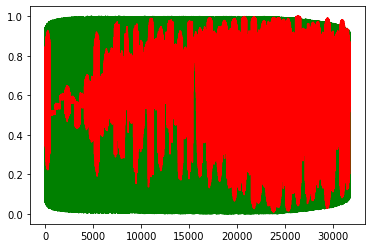

In [4]:

for i,data in enumerate(trainset):
        if i==0:
            x=Variable(data).cuda()
            y=vae(x)
            yp=torch.sigmoid(y).cpu().detach().numpy().reshape(20,62*512)
            xp=data[:,:,0:1024].reshape(20,62*1024).detach().numpy()
            no=5
            plt.plot(downsample(xp[no]),'g')
            plt.plot(yp[no],'r')
            break


<IPython.core.display.Javascript object>


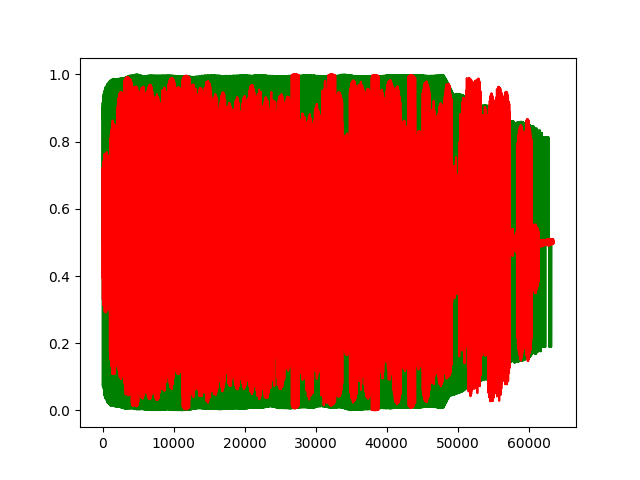

In [50]:
no=12
plt.plot(xp[no],'g')
plt.plot(upsample(yp[no]),'r')
plt.show()

In [51]:
Audio(xp[no],rate=16000)

In [49]:
Audio(upsample(yp[no]),rate=16000)